In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teen_phone_addiction_dataset_noisy.csv")

df.describe(include="all")

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000.000000,3000,2910,3000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2910.000000,3000,2910.000000,3000.000000,2910.000000
unique,NaN,2682,NaN,3,2460,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Richard Smith,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN
freq,NaN,4,NaN,1031,6,525,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,621,NaN,NaN,NaN
mean,1500.500000,NaN,16.094612,NaN,NaN,NaN,5.106210,6.542057,75.445682,5.199752,...,1.014604,84.605354,12.732850,2.523250,1.546379,1.032429,NaN,5.559183,6.074747,8.962396
std,866.169729,NaN,2.370140,NaN,NaN,NaN,2.175749,1.583042,15.595047,3.454915,...,0.503427,42.131456,4.829928,1.031296,0.971286,0.670990,NaN,3.200324,2.144491,1.905388
min,1.000000,NaN,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,750.750000,NaN,14.063936,NaN,NaN,NaN,3.718400,5.487200,62.000000,2.000000,...,0.674237,51.000000,9.000000,1.823647,0.835921,0.530142,NaN,3.000000,4.668098,8.084353
50%,1500.500000,NaN,15.995079,NaN,NaN,NaN,5.012012,6.510024,75.000000,5.000000,...,1.003879,82.000000,13.000000,2.512961,1.505765,0.985774,NaN,5.000000,6.046664,9.869926
75%,2250.250000,NaN,17.929240,NaN,NaN,NaN,6.400018,7.536298,88.000000,8.000000,...,1.369478,116.000000,17.000000,3.176709,2.188618,1.480672,NaN,8.000000,7.401048,10.000000


PRE-PROCESSING DATA

Now we will change the Non numeric values to Numeric values.

In [3]:
for c in df.columns:
    if df[c].dtype == "object":
        df[c] = df[c].astype(str).str.strip()

# ---------- Explicit replacements ----------
# Gender: Male=0, Female=1, Other=2
df.Gender.replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)   # 'Gender' column

# School_Grade: ordinal mapping
df.School_Grade.replace(['7th','8th','9th','10th','11th','12th'],
                        [7, 8, 9, 10, 11, 12], inplace=True)              # 'School_Grade' column

# Phone_Usage_Purpose: categorical mapping
df.Phone_Usage_Purpose.replace(['Education','Browsing','Social Media','Gaming','Other'],
                               [0, 1, 2, 3, 4], inplace=True)             # 'Phone_Usage_Purpose' column

# ---------- High-cardinality text ----------
# Location (many unique values + NaN → numeric codes)
df['Location'] = df['Location'].fillna('Unknown')
df['Location'], location_index = pd.factorize(df['Location'])             # 'Location' column

# Name (many unique values → numeric codes)
df['Name'], name_index = pd.factorize(df['Name'])                         # 'Name' column

# ---------- Summary ----------
print(df.describe(include="all"))
print(df.dtypes)


                ID         Name          Age       Gender     Location  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000  1292.467667    16.094612     0.980333  1136.811000   
std     866.169729   771.535287     2.370140     0.817008   719.737948   
min       1.000000     0.000000    13.000000     0.000000     0.000000   
25%     750.750000   624.750000    14.063936     0.000000   511.750000   
50%    1500.500000  1265.500000    15.995079     1.000000  1099.500000   
75%    2250.250000  1954.250000    17.929240     2.000000  1747.250000   
max    3000.000000  2681.000000    33.805617     2.000000  2460.000000   

       School_Grade  Daily_Usage_Hours  Sleep_Hours  Academic_Performance  \
count   3000.000000        3000.000000  3000.000000           3000.000000   
mean       9.515000           5.106210     6.542057             75.445682   
std        1.714474           2.175749     1.583042             15.595047   
min        7.000000      

C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\454911105.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)   # 'Gender' column
C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\454911105.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [4]:
df.isnull().values.any()

np.True_

In [5]:
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Gender                     0
Location                   0
School_Grade               0
Daily_Usage_Hours          0
Sleep_Hours                0
Academic_Performance       0
Social_Interactions        0
Exercise_Hours             0
Anxiety_Level              0
Depression_Level           0
Self_Esteem               90
Parental_Control           0
Screen_Time_Before_Bed     0
Phone_Checks_Per_Day       0
Apps_Used_Daily            0
Time_on_Social_Media       0
Time_on_Gaming             0
Time_on_Education         90
Phone_Usage_Purpose        0
Family_Communication      90
Weekend_Usage_Hours        0
Addiction_Level           90
dtype: int64

In [6]:
df.isnull().sum().sum()

np.int64(360)

We can see the Dataset has null values. Now we will visualise the null values by heatmap.


VISUALISING NULL VALUES USING HEATMAP

<Axes: >

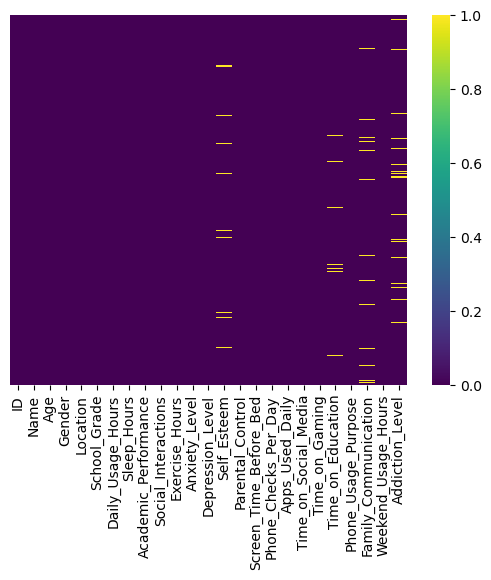

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\1902448045.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,1292.467667,16.094612,0.980333,1136.811000,9.515000,5.106210,6.542057,75.445682,5.199752,...,1.014604,84.605354,12.732850,2.523250,1.546379,1.034763,1.992000,5.562832,6.074747,8.955698
std,866.169729,771.535287,2.370140,0.817008,719.737948,1.714474,2.175749,1.583042,15.595047,3.454915,...,0.503427,42.131456,4.829928,1.031296,0.971286,0.664672,1.428735,3.166582,2.144491,1.888437
min,1.000000,0.000000,13.000000,0.000000,0.000000,7.000000,0.000000,3.000000,50.000000,0.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,624.750000,14.063936,0.000000,511.750000,8.000000,3.718400,5.487200,62.000000,2.000000,...,0.674237,51.000000,9.000000,1.823647,0.835921,0.542197,1.000000,3.000000,4.668098,8.045576
50%,1500.500000,1265.500000,15.995079,1.000000,1099.500000,9.000000,5.012012,6.510024,75.000000,5.000000,...,1.003879,82.000000,13.000000,2.512961,1.505765,0.991248,2.000000,5.555365,6.046664,9.857383
75%,2250.250000,1954.250000,17.929240,2.000000,1747.250000,11.000000,6.400018,7.536298,88.000000,8.000000,...,1.369478,116.000000,17.000000,3.176709,2.188618,1.476983,3.000000,8.000000,7.401048,10.000000
max,3000.000000,2681.000000,33.805617,2.000000,2460.000000,12.000000,21.135083,18.975768,168.569612,28.972808,...,4.196132,382.673086,39.043472,10.310948,8.751409,5.095310,4.000000,29.170107,22.981435,21.416212


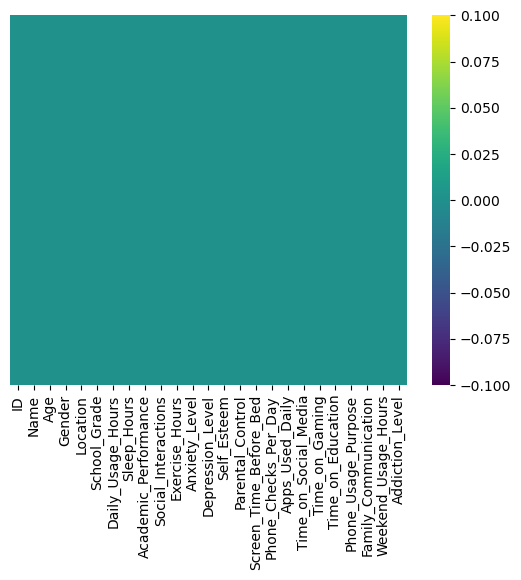

In [8]:
# Handling Null values

# filling null values in 'Gender' with mode value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# filling null values with mean ± std in numerical columns
num_cols = ['Self_Esteem', 'Time_on_Education', 'Family_Communication', 'Addiction_Level']

for col in num_cols:
    avg = df[col].mean()
    std = df[col].std()
    count = df[col].isnull().sum()
    random = np.random.uniform(avg - std, avg + std, size=count)
    df.loc[df[col].isnull(), col] = random

# visualizing null values after imputation
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# optional: describe the dataset
df.describe(include='all')


In [9]:
# correlation of each feature with target
target_corr = df.corr()['Addiction_Level'].sort_values(ascending=False)
print("Correlation with target (Addiction_Level):\n")
print(target_corr)


Correlation with target (Addiction_Level):

Addiction_Level           1.000000
Daily_Usage_Hours         0.456024
Apps_Used_Daily           0.249859
Time_on_Social_Media      0.247899
Time_on_Gaming            0.207089
Phone_Checks_Per_Day      0.179762
Phone_Usage_Purpose       0.027156
Academic_Performance      0.017254
Location                  0.010925
School_Grade              0.006819
Family_Communication      0.004515
Screen_Time_Before_Bed    0.001643
Depression_Level         -0.002288
Age                      -0.003217
Anxiety_Level            -0.003512
Gender                   -0.011412
Time_on_Education        -0.012533
ID                       -0.012953
Parental_Control         -0.014521
Social_Interactions      -0.014698
Weekend_Usage_Hours      -0.019785
Name                     -0.021618
Self_Esteem              -0.029132
Exercise_Hours           -0.040273
Sleep_Hours              -0.183788
Name: Addiction_Level, dtype: float64


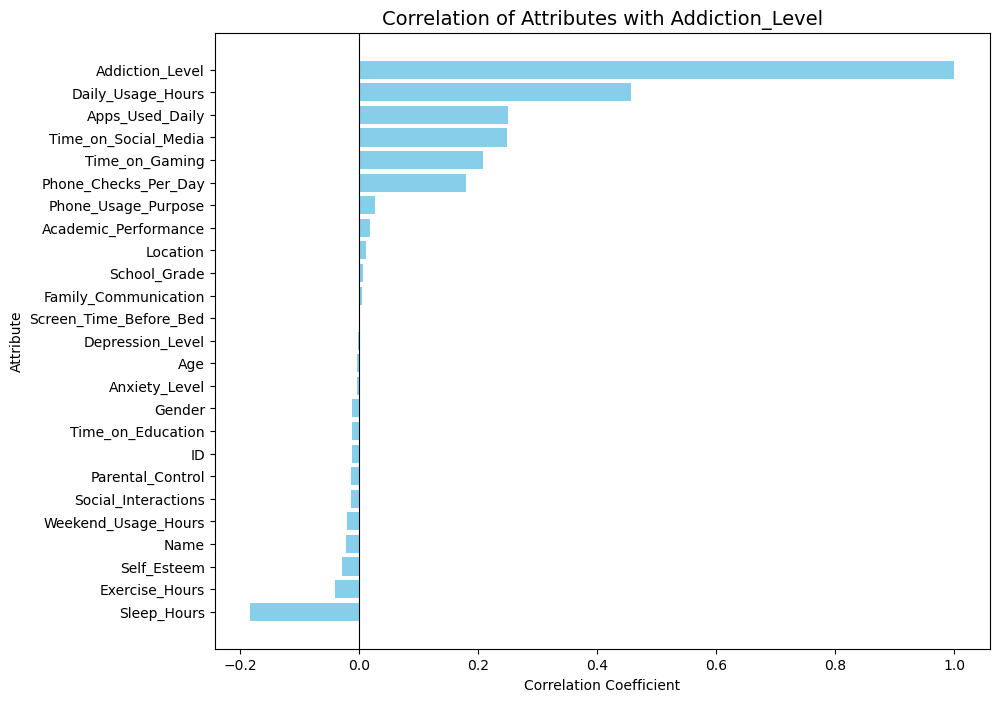

In [10]:
# Convert to DataFrame
df_corr = pd.DataFrame(list(target_corr.items()), columns=["Attribute", "Correlation"])
df_corr_sorted = df_corr.sort_values(by="Correlation", ascending=False)

# Plot
plt.figure(figsize=(10,8))
plt.barh(df_corr_sorted["Attribute"], df_corr_sorted["Correlation"], color="skyblue")
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Correlation of Attributes with Addiction_Level", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute")
plt.gca().invert_yaxis()  # highest correlation on top
plt.show()

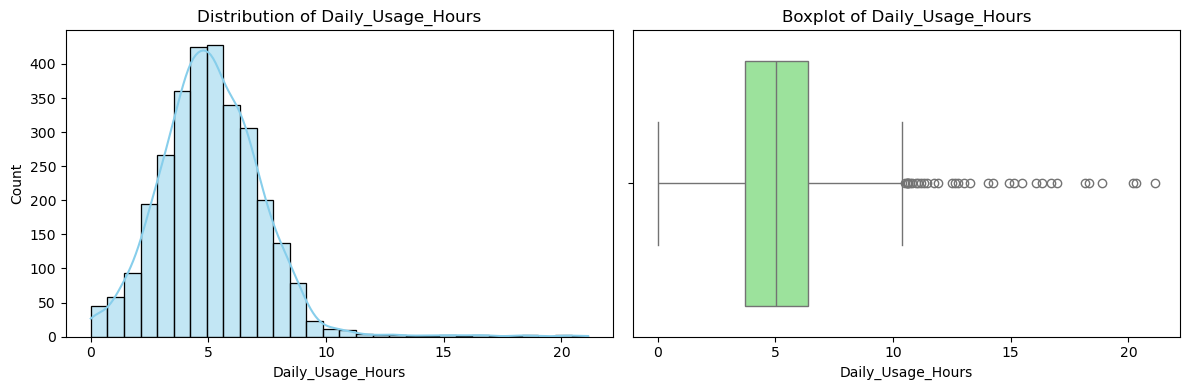

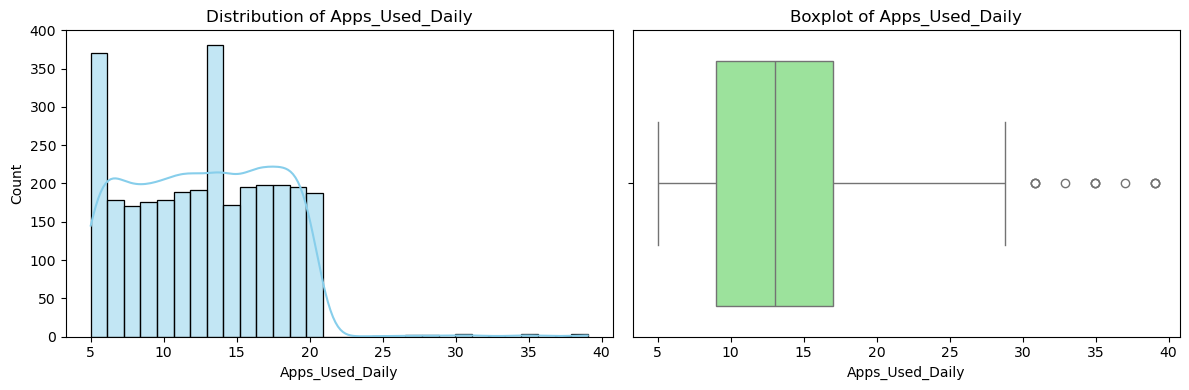

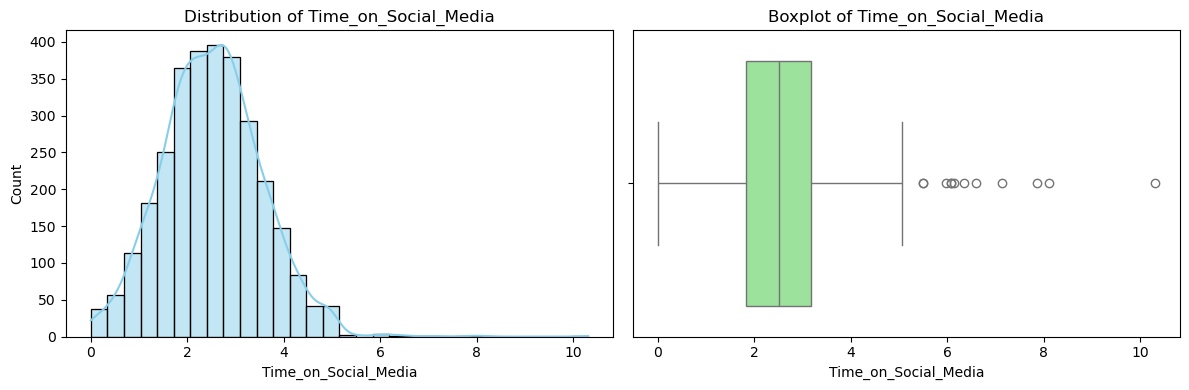

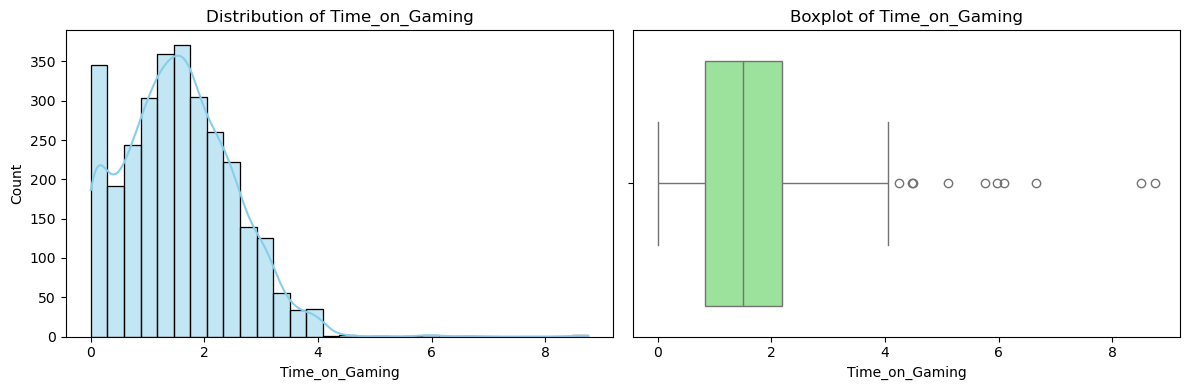

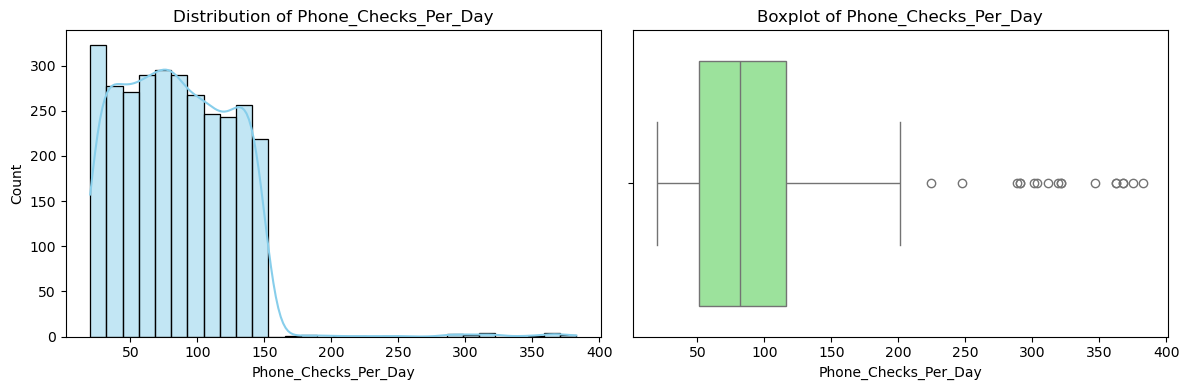

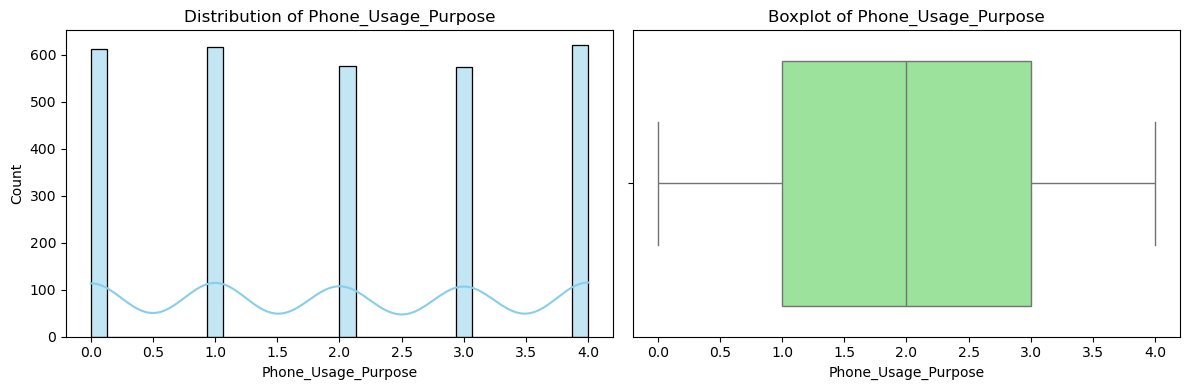

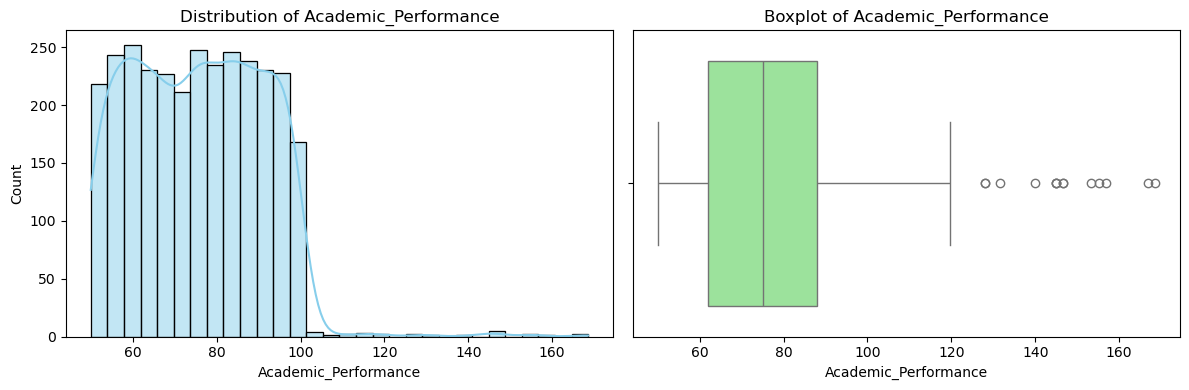

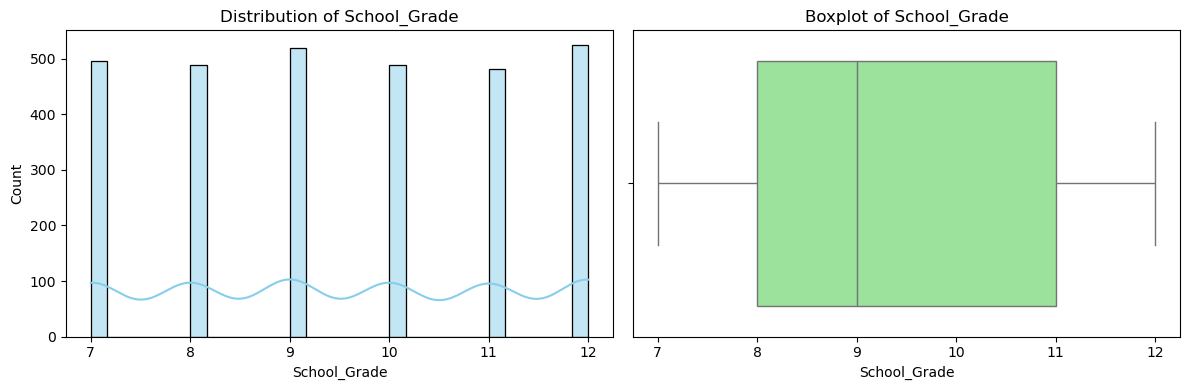

In [11]:

# list of features to check
features = [
    "Daily_Usage_Hours", "Apps_Used_Daily", 
    "Time_on_Social_Media", "Time_on_Gaming", "Phone_Checks_Per_Day", "Phone_Usage_Purpose","Academic_Performance"  ,"School_Grade"
]

# plot for each feature
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df[col], kde=True, ax=axes[0], bins=30, color="skyblue")
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


In [12]:
import tabulate
def mad_outlier_caps(df, cols, k=3.5):
    summary = {}
    df_out = df.copy()
    for c in cols:
        x = df_out[c].values.astype(float)
        med = np.nanmedian(x)
        mad = np.nanmedian(np.abs(x - med)) + 1e-9
        lower = med - k * 1.4826 * mad
        upper = med + k * 1.4826 * mad
        
        # Count outliers
        outliers = ((x < lower) | (x > upper)).sum()
        summary[c] = {
            "median": med,
            "mad": mad,
            "lower_cap": lower,
            "upper_cap": upper,
            "outliers_detected": int(outliers)
        }
        
        # Winsorize
        df_out[c] = np.clip(x, lower, upper)
    return df_out, pd.DataFrame(summary).T
  
cols_to_check = [
    "Daily_Usage_Hours", "Sleep_Hours", "Apps_Used_Daily", 
    "Time_on_Social_Media", "Time_on_Gaming", "Phone_Checks_Per_Day"
]

df_winsor, outlier_summary = mad_outlier_caps(df, cols_to_check)

print(tabulate.tabulate(outlier_summary, headers="keys", tablefmt="pretty"))


+----------------------+--------------------+--------------------+---------------------+--------------------+-------------------+
|                      |       median       |        mad         |      lower_cap      |     upper_cap      | outliers_detected |
+----------------------+--------------------+--------------------+---------------------+--------------------+-------------------+
|  Daily_Usage_Hours   | 5.0120119671443035 | 1.3571366744508195 | -2.0303059502484437 | 12.05432988453705  |       20.0        |
|     Sleep_Hours      | 6.510023664317233  | 1.0242592928286158 |  1.195039767900262  | 11.825007560734203 |       14.0        |
|   Apps_Used_Daily    |        13.0        |    4.000000001     |  -7.7564000051891   |  33.7564000051891  |        7.0        |
| Time_on_Social_Media | 2.512961123036127  | 0.677028403969611  | -1.0002069680025811 | 6.026129214074835  |        9.0        |
|    Time_on_Gaming    | 1.505765056755681  | 0.675364899693803  | -1.9987709442454318 | 5

In [13]:

# Function to handle outliers using MAD (replace with median)
def handle_outliers_mad(df, cols, k=3.5):
    summary = {}
    df_out = df.copy()
    
    for col in cols:
        # Calculate MAD
        med = df_out[col].median()
        mad = 1.4826 * np.median(np.abs(df_out[col] - med))
        
        # Outlier mask
        outlier_mask = np.abs(df_out[col] - med) > (k * mad)
        outlier_count = outlier_mask.sum()
        
        # Replace outliers with median
        df_out.loc[outlier_mask, col] = med
        
        # Save summary
        summary[col] = {
            "median": med,
            "mad": mad,
            "outliers_handled": int(outlier_count)
        }
        
        print(f"{col}: MAD = {mad:.4f}, Outliers handled = {outlier_count}")
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(summary).T
    return df_out, summary_df


# Features to check
features = [
    "Daily_Usage_Hours",
    "Apps_Used_Daily",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Phone_Checks_Per_Day",
    "Academic_Performance"
]

# Apply function on df
df_clean, mad_summary = handle_outliers_mad(df, features)

# Show summary table
print("\nOutlier Handling Summary (MAD method):")
print(mad_summary)


Daily_Usage_Hours: MAD = 2.0121, Outliers handled = 20
Apps_Used_Daily: MAD = 5.9304, Outliers handled = 7
Time_on_Social_Media: MAD = 1.0038, Outliers handled = 9
Time_on_Gaming: MAD = 1.0013, Outliers handled = 7
Phone_Checks_Per_Day: MAD = 47.4432, Outliers handled = 16
Academic_Performance: MAD = 19.2738, Outliers handled = 10

Outlier Handling Summary (MAD method):
                         median        mad  outliers_handled
Daily_Usage_Hours      5.012012   2.012091              20.0
Apps_Used_Daily       13.000000   5.930400               7.0
Time_on_Social_Media   2.512961   1.003762               9.0
Time_on_Gaming         1.505765   1.001296               7.0
Phone_Checks_Per_Day  82.000000  47.443200              16.0
Academic_Performance  75.000000  19.273800              10.0


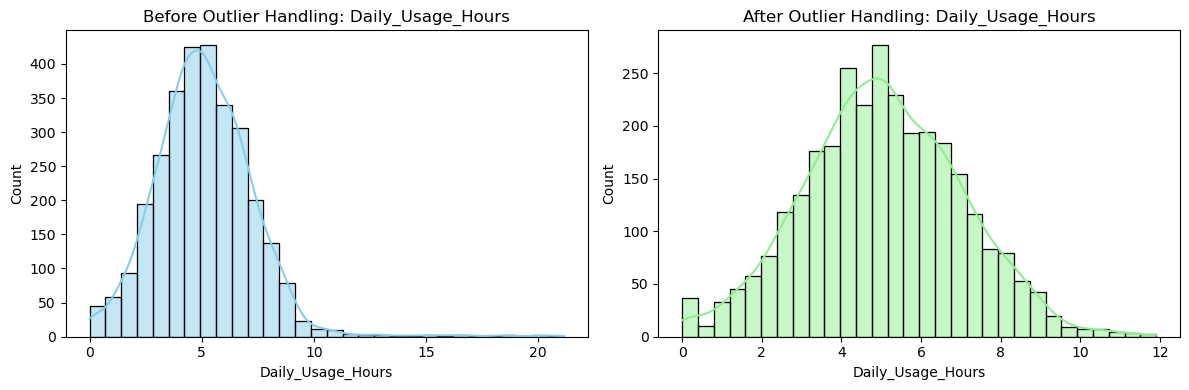

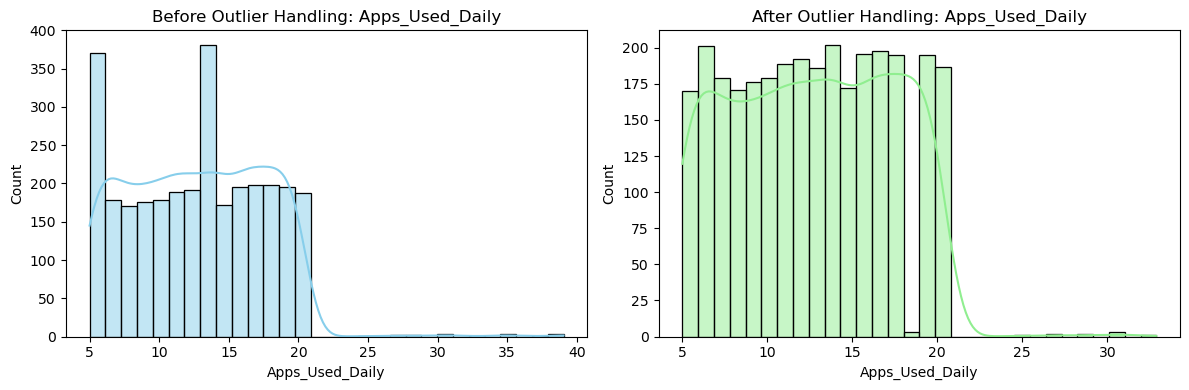

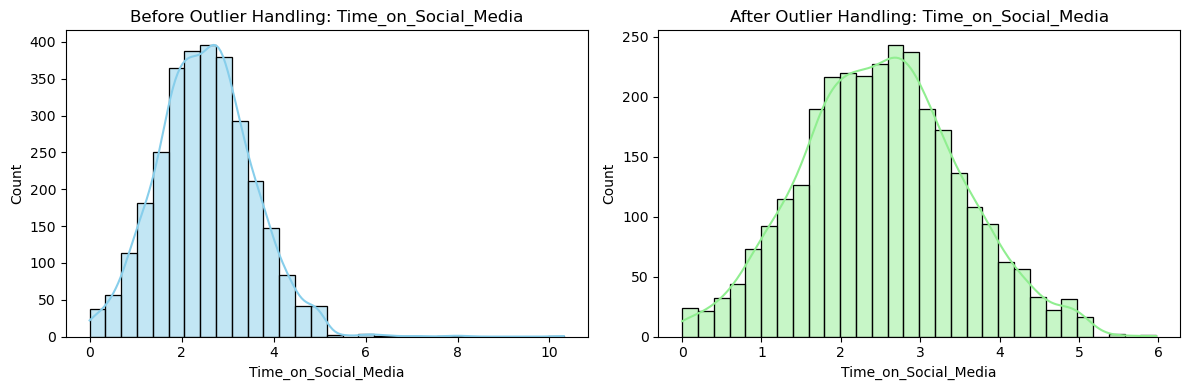

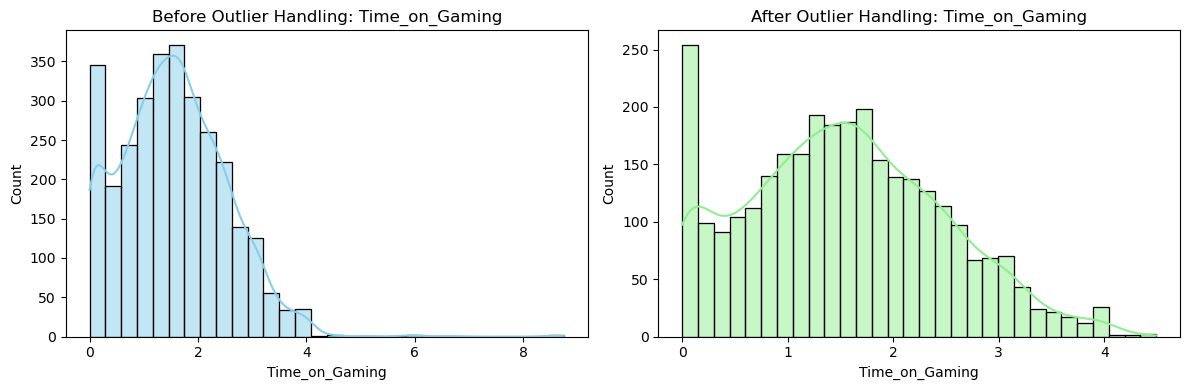

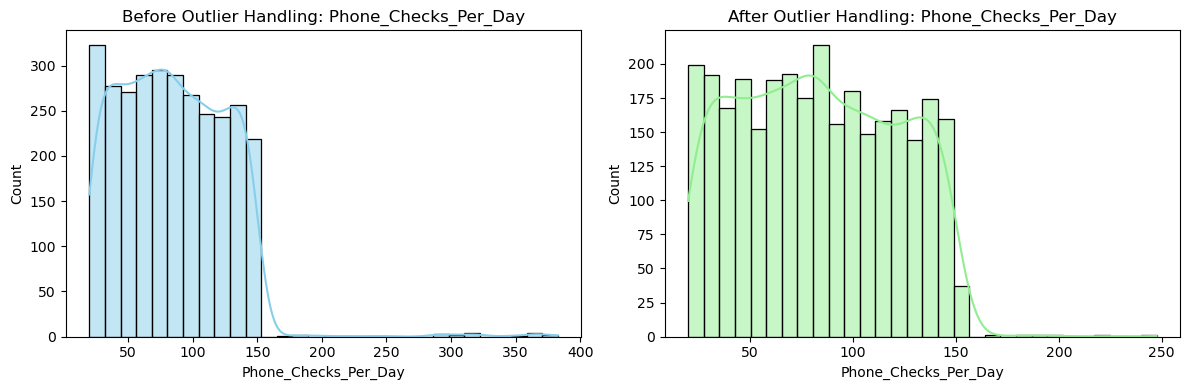

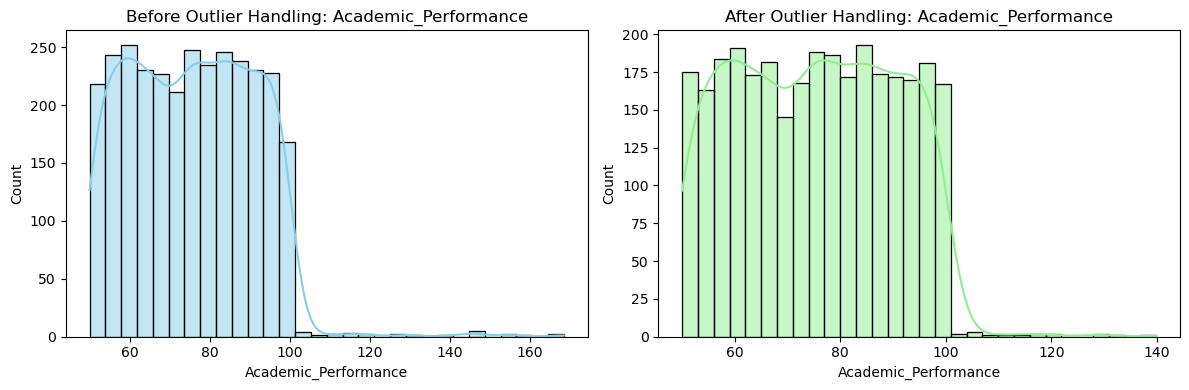

In [14]:
# Features to visualize
features = [
    "Daily_Usage_Hours",
    "Apps_Used_Daily",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Phone_Checks_Per_Day",
    "Academic_Performance"
]

# Plot before vs after outlier handling
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before cleaning
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=axes[0])
    axes[0].set_title(f"Before Outlier Handling: {col}")

    # After cleaning
    sns.histplot(df_clean[col], kde=True, bins=30, color="lightgreen", ax=axes[1])
    axes[1].set_title(f"After Outlier Handling: {col}")

    plt.tight_layout()
    plt.show()


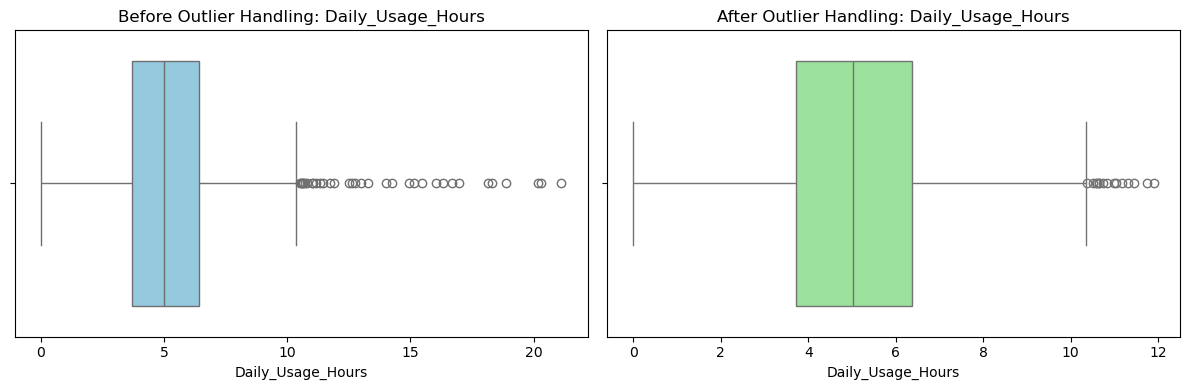

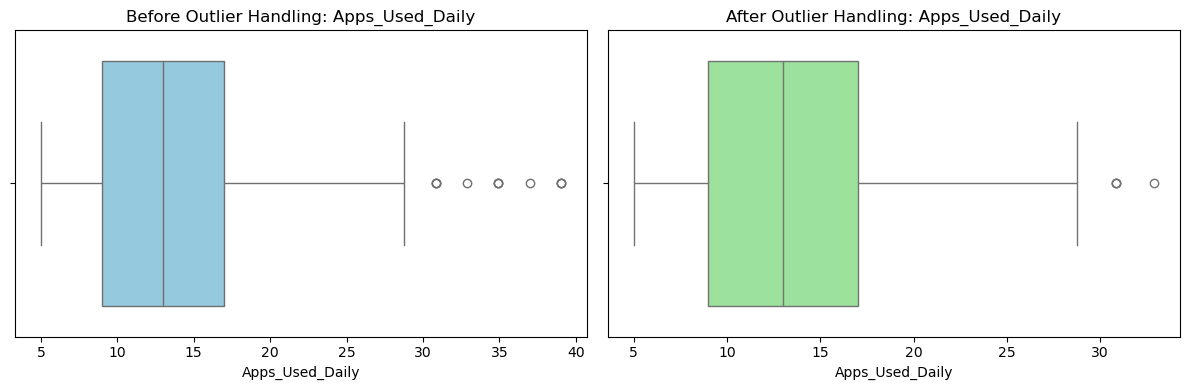

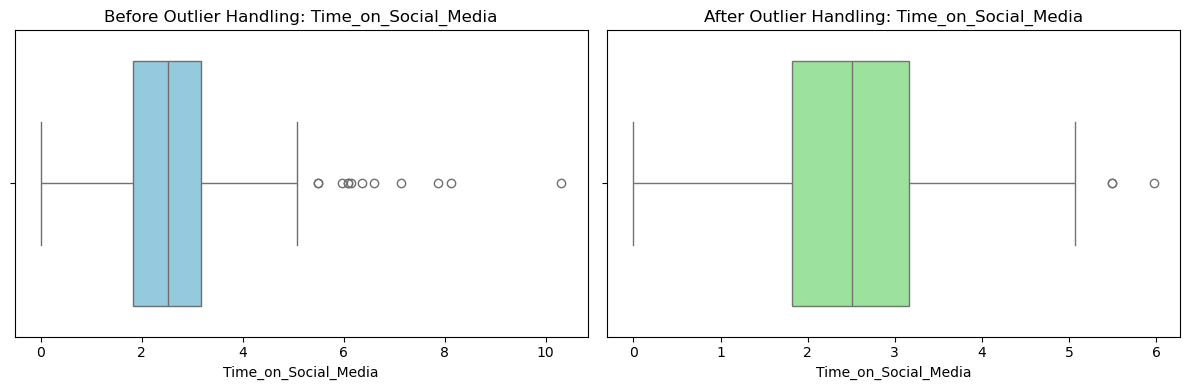

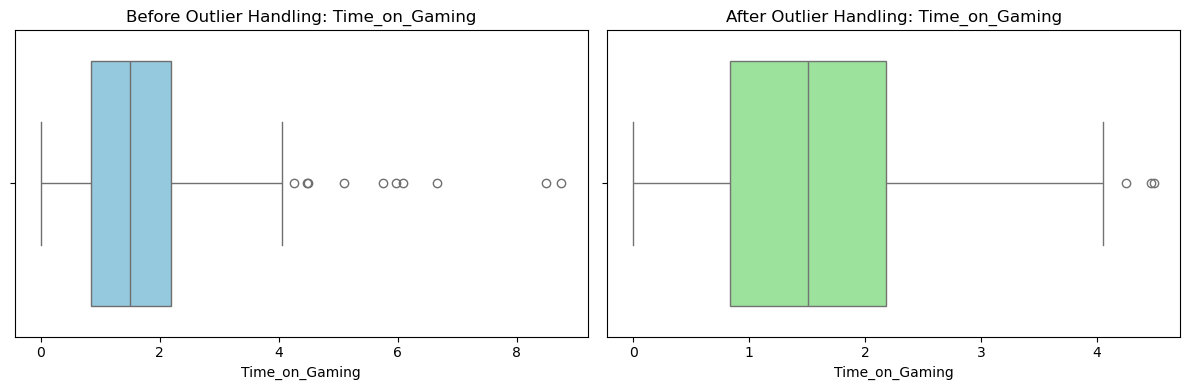

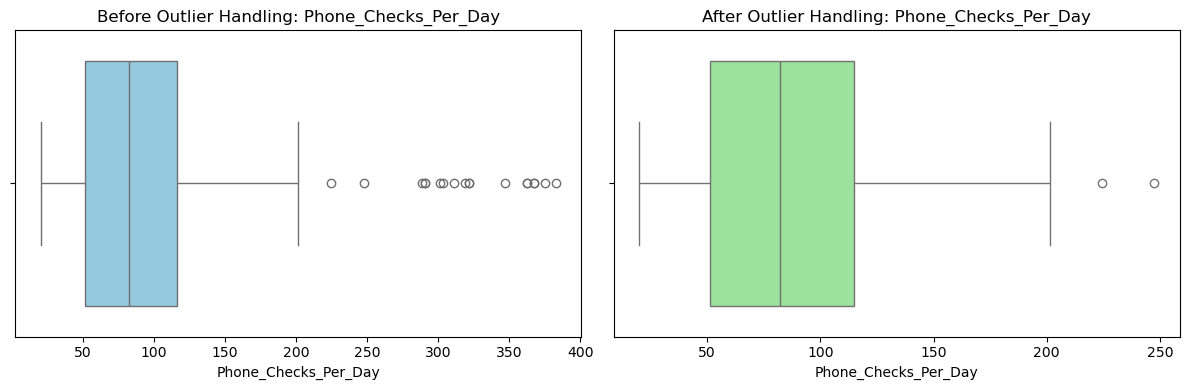

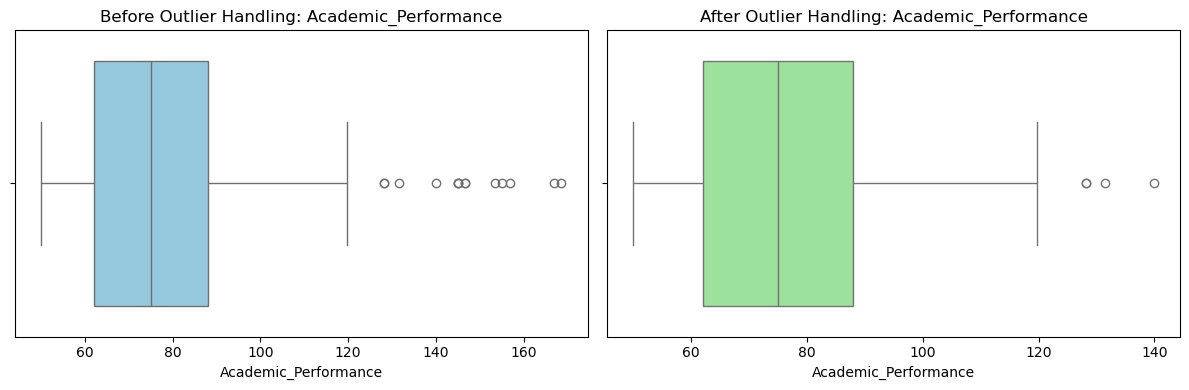

In [15]:
# Features to visualize
features = [
    "Daily_Usage_Hours",
    "Apps_Used_Daily",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Phone_Checks_Per_Day",
    "Academic_Performance"
]

# Plot before vs after outlier handling (Boxplots)
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before cleaning
    sns.boxplot(x=df[col], ax=axes[0], color="skyblue")
    axes[0].set_title(f"Before Outlier Handling: {col}")

    # After cleaning
    sns.boxplot(x=df_clean[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"After Outlier Handling: {col}")

    plt.tight_layout()
    plt.show()


C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\650944238.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\650944238.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\650944238.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\650944238.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


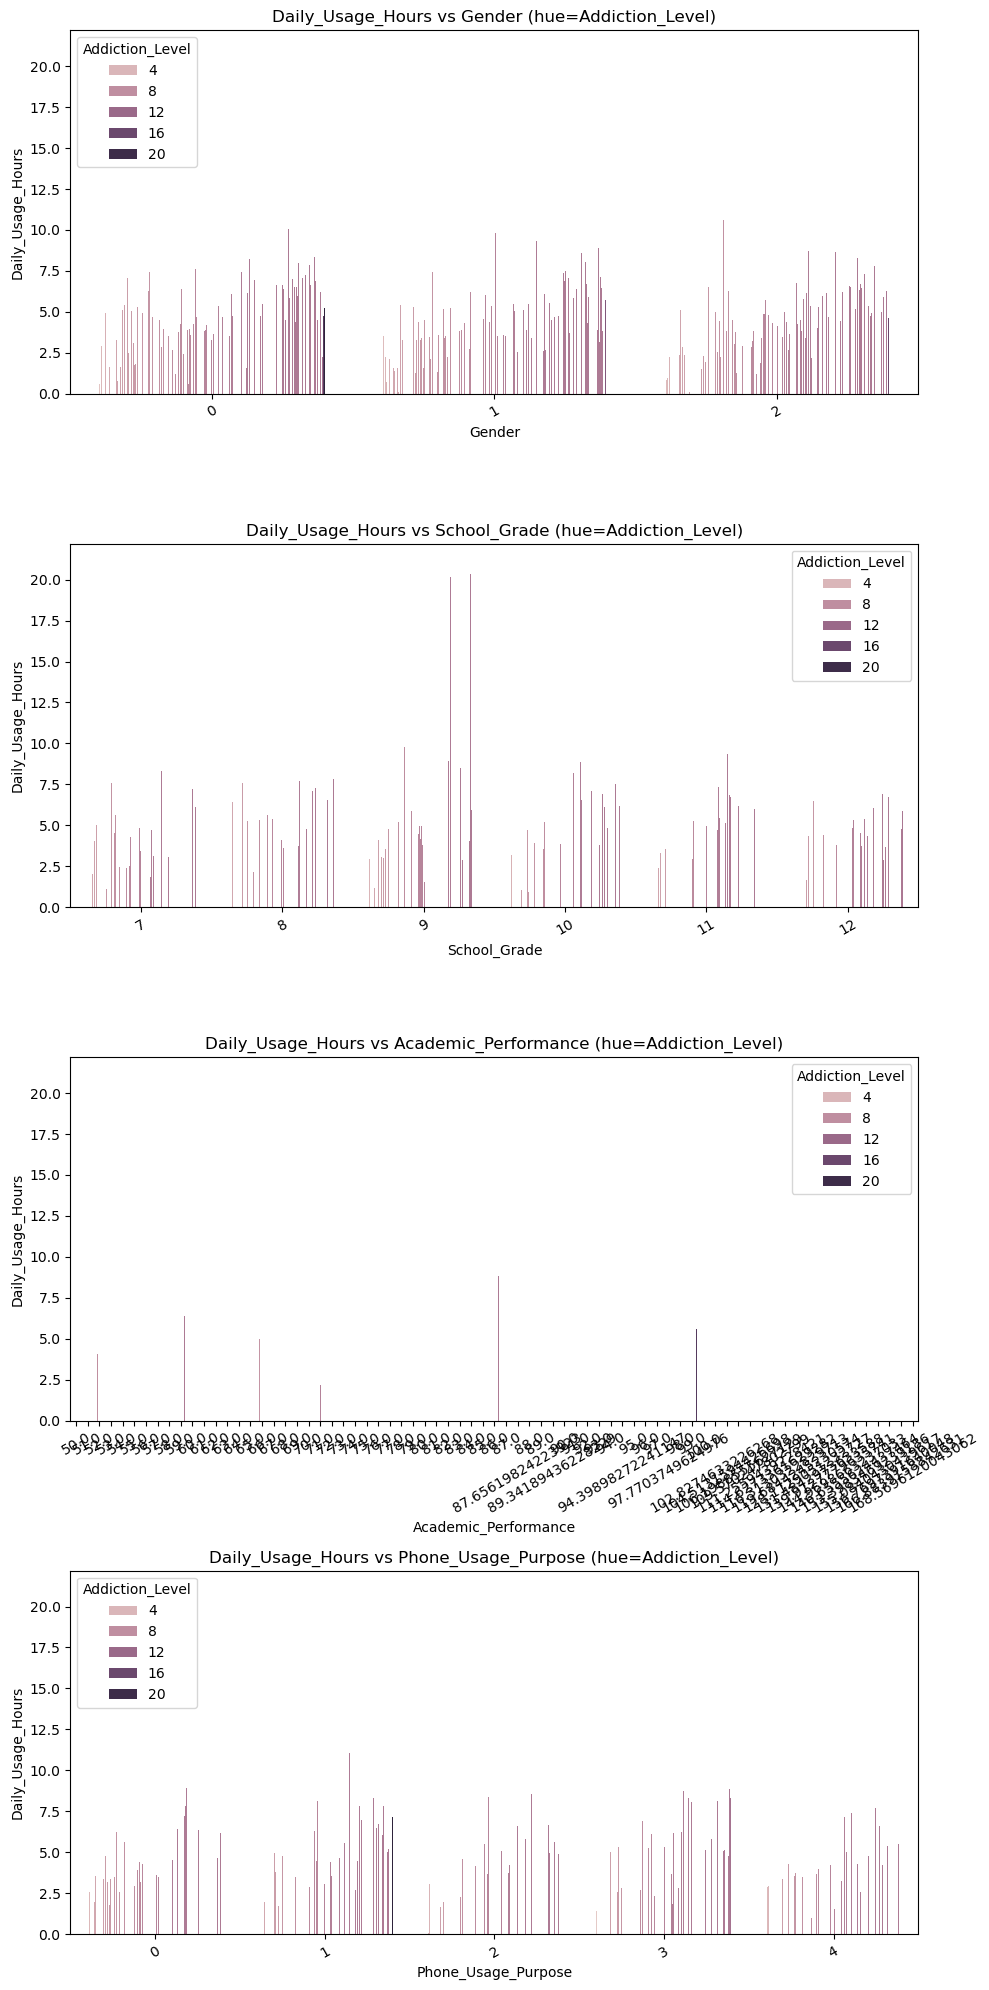

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target column
target_col = "Addiction_Level"

# Numeric feature to compare (like LoanAmount in report)
numeric_col = "Daily_Usage_Hours"

# Categorical features (change according to your dataset)
cat_features = [
    "Gender",
    "School_Grade",
    "Academic_Performance",
    "Phone_Usage_Purpose"
]

# Prepare canvas (subplots stacked vertically)
f, axes = plt.subplots(len(cat_features), 1, figsize=(10, 5*len(cat_features)))

# Plot for each categorical feature
for i, col in enumerate(cat_features):
    sns.barplot(
        x=col, y=numeric_col, hue=target_col,
        data=df, ci=None, ax=axes[i]
    )
    axes[i].set_title(f"{numeric_col} vs {col} (hue={target_col})")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [17]:
print(df["Addiction_Level"].value_counts())

Addiction_Level
10.000000    727
21.416212      7
9.969371       1
9.919123       1
9.873743       1
            ... 
9.849445       1
9.854790       1
9.931181       1
7.862483       1
8.493408       1
Name: count, Length: 2268, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features & Target
X = df.drop("Addiction_Level", axis=1)
y = df["Addiction_Level"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest Regressor implemented successfully")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


✅ Random Forest Regressor implemented successfully
RMSE: 1.250
R² Score: 0.552



📌 Top Features influencing Addiction Level:
                   Feature  Importance
6        Daily_Usage_Hours    0.331424
18    Time_on_Social_Media    0.108171
19          Time_on_Gaming    0.090471
17         Apps_Used_Daily    0.089849
16    Phone_Checks_Per_Day    0.071049
7              Sleep_Hours    0.063732
20       Time_on_Education    0.038403
15  Screen_Time_Before_Bed    0.025033
10          Exercise_Hours    0.023348
23     Weekend_Usage_Hours    0.021877


C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\3465347781.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")


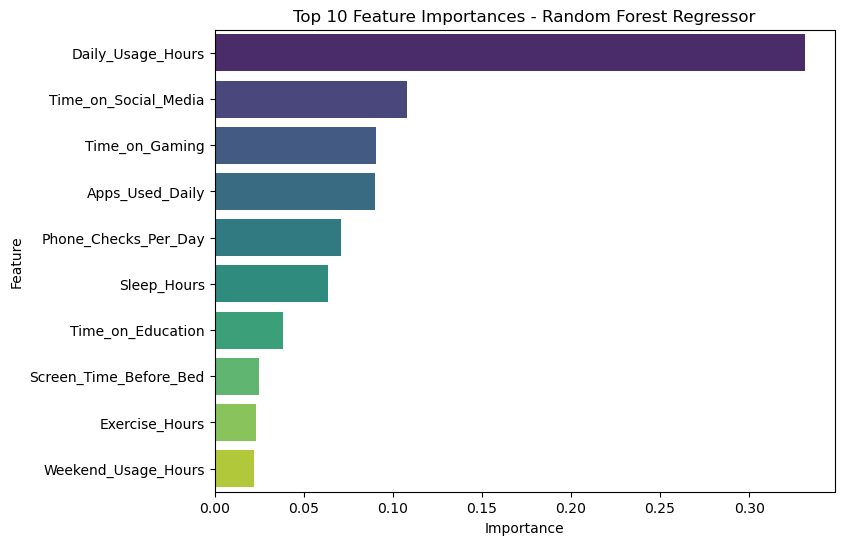

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance
importances = rf_reg.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n📌 Top Features influencing Addiction Level:")
print(feat_imp.head(10))

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest Regressor")
plt.show()


In [20]:
import numpy as np

# === Add train/test flag ===
df["is_train"] = np.random.uniform(0, 1, len(df)) <= 0.75

# === Create train and test sets ===
train, test = df[df["is_train"] == True], df[df["is_train"] == False]

print("No. of observations in training dataset:", len(train))
print("No. of observations in testing dataset:", len(test))

# === Features (excluding target and helper column) ===
f = df.columns.drop(["Addiction_Level", "is_train"])
print("Features used for training:", f.tolist())


No. of observations in training dataset: 2249
No. of observations in testing dataset: 751
Features used for training: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours']


KNN REGRESSOR

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# =============================
# Step 1: Define Features & Target
# =============================
# Features are all columns except "Addiction_Level"
X = df.drop("Addiction_Level", axis=1)
# Target is the Addiction_Level score
y = df["Addiction_Level"]

# =============================
# Step 2: Create Standardizer
# =============================
# StandardScaler() will normalize features so that KNN works correctly
standardizer = StandardScaler()

# =============================
# Step 3: Define KNN Model
# =============================
# Start with a basic KNN Regressor (default neighbors = 5)
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean", n_jobs=-1)

# =============================
# Step 4: Create a Pipeline
# =============================
# Pipeline connects preprocessing + model into one flow
pipe = Pipeline([
    ("standardizer", standardizer),
    ("knn", knn)
])

# =============================
# Step 5: Define Search Space for k
# =============================
# We will try different numbers of neighbors (k values from 2 to 10),
# two weighting methods, and two distance metrics
search_space = {
    "knn__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]   # 1 = Manhattan distance, 2 = Euclidean distance
}

# =============================
# Step 6: Grid Search with Cross-Validation
# =============================
# GridSearchCV will try all combinations of hyperparameters
# and select the best performing one using 5-fold CV
clf = GridSearchCV(pipe, search_space, cv=5, scoring="r2", verbose=1, n_jobs=-1)
clf.fit(X, y)

# =============================
# Step 7: Find the Best Value of k
# =============================
best_k = clf.best_estimator_.get_params()["knn__n_neighbors"]

print("✅ Best neighborhood size (k):", best_k)
print("Best Parameters:", clf.best_params_)
print("Best Cross-Validation R²:", clf.best_score_)

# =============================
# Step 8: Evaluate on the Whole Dataset (optional)
# =============================
y_pred = clf.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Final RMSE on dataset: {rmse:.3f}")
print(f"Final R² on dataset: {r2:.3f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best neighborhood size (k): 10
Best Parameters: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
Best Cross-Validation R²: 0.2915309625409559
Final RMSE on dataset: 0.000
Final R² on dataset: 1.000


In [23]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Refit GridSearchCV on training set only
clf = GridSearchCV(pipe, search_space, cv=5, scoring="r2", verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

# Best Params
best_k = clf.best_estimator_.get_params()["knn__n_neighbors"]
print("✅ Best neighborhood size (k):", best_k)
print("Best Parameters:", clf.best_params_)
print("Best Cross-Validation R²:", clf.best_score_)

# Evaluate on Test Set
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best neighborhood size (k): 10
Best Parameters: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
Best Cross-Validation R²: 0.30742372050052014
Test RMSE: 1.586
Test R²: 0.279


CONFUSION MATRIX

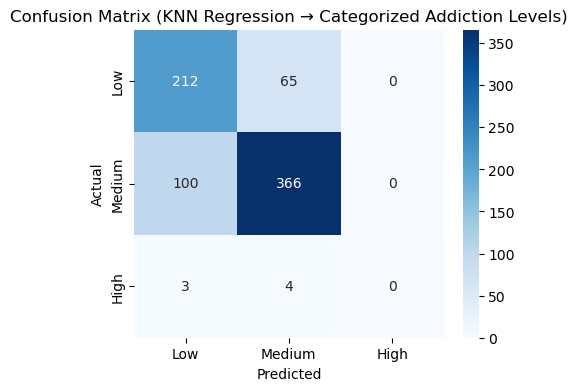

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define bins (you can adjust thresholds based on your data distribution)
bins = [0, 9, 15, 25]  
labels = ["Low", "Medium", "High"]

# Convert continuous values into categories
y_test_cat = pd.cut(y_test, bins=bins, labels=labels)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels)

# Confusion Matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN Regression → Categorized Addiction Levels)")
plt.show()


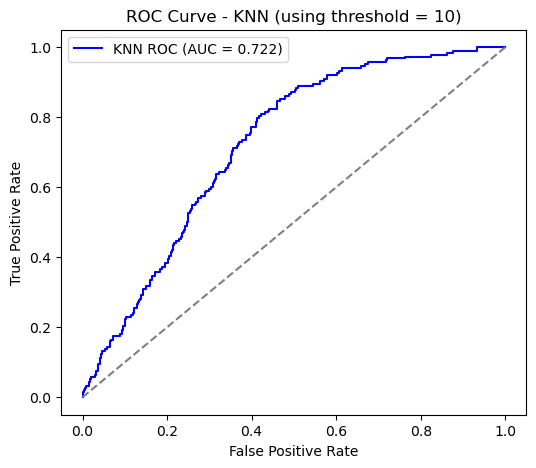

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a threshold to convert regression output into binary
threshold = 10
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# For ROC, we need probabilities — but KNN regression gives continuous outputs,
# so we can use raw predicted values (normalized)
y_pred_scores = y_pred  

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_scores)
auc = roc_auc_score(y_test_binary, y_pred_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"KNN ROC (AUC = {auc:.3f})", color="blue")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (using threshold = 10)")
plt.legend()
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# === Step 1: Convert Regression Target into Binary ===
threshold = 10
y_class = (y >= threshold).astype(int)   # 1 = Addicted, 0 = Not Addicted

# === Step 2: Define Pipeline (Scaler + KNN Classifier) ===
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="euclidean"))
])

# === Step 3: Cross-Validate Recall and Precision ===
recall_scores = cross_val_score(pipeline, X, y_class, cv=5, scoring="recall")
precision_scores = cross_val_score(pipeline, X, y_class, cv=5, scoring="precision")

print("✅ Cross-Validation Results (5-fold)")
print("Recall:   Mean =", round(np.mean(recall_scores), 3), 
      "| Scores =", np.round(recall_scores, 3))
print("Precision: Mean =", round(np.mean(precision_scores), 3), 
      "| Scores =", np.round(precision_scores, 3))


✅ Cross-Validation Results (5-fold)
Recall:   Mean = 0.083 | Scores = [0.058 0.084 0.09  0.065 0.116]
Precision: Mean = 0.532 | Scores = [0.45  0.591 0.583 0.455 0.581]


DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# === Step 1: Features & Target ===
X = df.drop("Addiction_Level", axis=1)
y = df["Addiction_Level"]

# === Step 2: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# === Step 3: Train Tuned Decision Tree Regressor ===
Decision_Tree_Reg = DecisionTreeRegressor(
    max_depth=5,           # limit depth of tree
    min_samples_leaf=10,   # at least 10 samples per leaf node
    random_state=42
)
Decision_Tree_Reg.fit(X_train, y_train)

# === Step 4: Predictions ===
prediction = Decision_Tree_Reg.predict(X_test)

# === Step 5: Evaluation ===
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print("✅ Tuned Decision Tree Regressor Report")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Optional: Show tuned model object
Decision_Tree_Reg


✅ Tuned Decision Tree Regressor Report
RMSE: 1.465
R² Score: 0.385


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

C:\Users\deogh\AppData\Local\Temp\ipykernel_3632\3354808182.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")


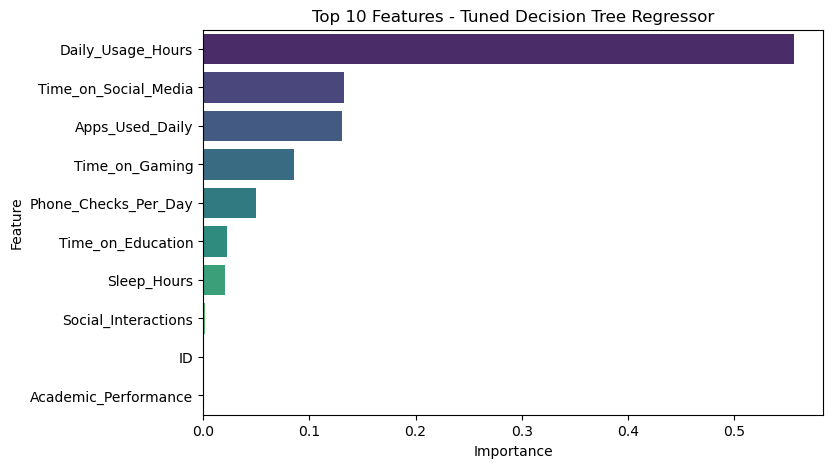

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = Decision_Tree_Reg.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Features - Tuned Decision Tree Regressor")
plt.show()


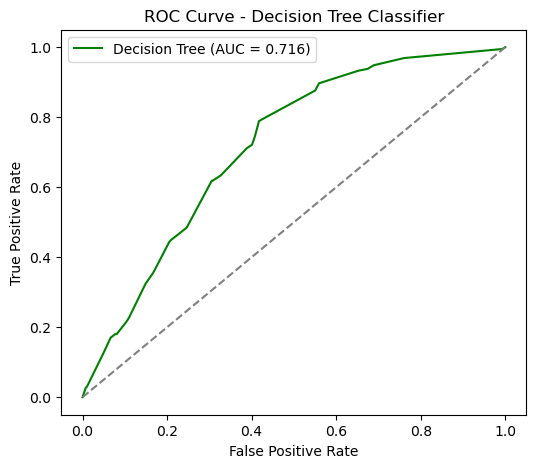

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# === Step 1: Convert Target to Binary ===
threshold = 10
y_class = (df["Addiction_Level"] >= threshold).astype(int)  # 1 = Addicted, 0 = Not Addicted
X = df.drop("Addiction_Level", axis=1)

# === Step 2: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.25, random_state=42, stratify=y_class
)

# === Step 3: Train Decision Tree Classifier ===
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt_clf.fit(X_train, y_train)

# === Step 4: Predict Probabilities ===
y_prob = dt_clf.predict_proba(X_test)[:, 1]

# === Step 5: ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.3f})", color="green")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.show()
